In [31]:
import os
import sys

sys.path.append(r"C:\Users\Mohamed\Documents\Fall 2023 - 2024\Senior Project in CS\sysPath")

import numpy as np
import pandas as pd
import seaborn as sns
import preProcessData #type: ignore
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from matplotlib import style

le = LabelEncoder()
style.use("ggplot")

In [32]:
dataset = pd.read_csv(r"https://raw.githubusercontent.com/iabufarha/ArSarcasm-v2/main/ArSarcasm-v2/training_data.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12548 entries, 0 to 12547
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      12548 non-null  object
 1   sarcasm    12548 non-null  bool  
 2   sentiment  12548 non-null  object
 3   dialect    12548 non-null  object
dtypes: bool(1), object(3)
memory usage: 306.5+ KB


In [33]:
cleaned_dataset = preProcessData.preProcessData(dataset.copy(deep=True))


----------         cleanData Done!         ----------


---------- dataAugmentation done in a separate file ----------


----------     dataTokenization Done!      ----------



In [34]:
# prepare tokenizer
T = Tokenizer()
T.fit_on_texts(cleaned_dataset["tweet"].tolist())
vocab_size = len(T.word_index) + 1

In [35]:
# integer encode the documents
encoded_docs = T.texts_to_sequences(cleaned_dataset["tweet"].tolist())

In [36]:
# pad documents to a max length of 4 words
max_length = len(max(np.array(cleaned_dataset["tweet"]), key=len))
padded_docs = pad_sequences(encoded_docs, maxlen = max_length, padding = "post")
print("\npadded_docs:\n\n",padded_docs)


padded_docs:

 [[    4   716   675 ...     0     0     0]
 [   91  3209  8916 ...     0     0     0]
 [   34 15248  8917 ...     0     0     0]
 ...
 [   28 13908   804 ...     0     0     0]
 [   51  3700     0 ...     0     0     0]
 [ 2590  3133  1962 ...     0     0     0]]


In [37]:
# columns = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T"]
columns = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
# columns = ["A", "B", "C", "D", "E"]
padded_docs = PCA(n_components=len(columns)).fit_transform(padded_docs)
padded_docs = StandardScaler().fit_transform(padded_docs)
padded_docs = MinMaxScaler().fit_transform(padded_docs)

features = pd.DataFrame(padded_docs, columns=columns)
features["sentiment"] = cleaned_dataset[["sentiment"]].copy()
features["dialect"] = cleaned_dataset[["dialect"]].copy()

labels = cleaned_dataset[["sarcasm"]].copy()

In [38]:
tweet_train, tweet_test, labeled_train, labeled_test = train_test_split(features, labels, test_size=0.2, shuffle=True)

In [39]:
print(tweet_train.shape)
print(type(labeled_test))

(10038, 12)
<class 'pandas.core.frame.DataFrame'>


In [40]:
sm = SMOTE(random_state=42)
tweet_train, labeled_train = sm.fit_resample(tweet_train, labeled_train)

In [41]:
# fit the model
svc = SVC(kernel="linear", C=1.0)
svc.fit(tweet_train, labeled_train)



#evaluate the model
trainScore = svc.score(tweet_train, labeled_train)
testScore = svc.score(tweet_test, labeled_test)
labelPredicted = svc.predict(tweet_test)

print()

print(f"\nSVC model score on the training dataset: {trainScore:.2f}")
print(f"SVC model score on the test dataset:     {testScore:.2f}\n")

print(classification_report(labeled_test, labelPredicted, target_names=["Class: 0", "Class: 1"]))



SVC model score on the training dataset: 0.82
SVC model score on the test dataset:     0.76

              precision    recall  f1-score   support

    Class: 0       0.97      0.74      0.84      2086
    Class: 1       0.41      0.90      0.56       424

    accuracy                           0.76      2510
   macro avg       0.69      0.82      0.70      2510
weighted avg       0.88      0.76      0.79      2510



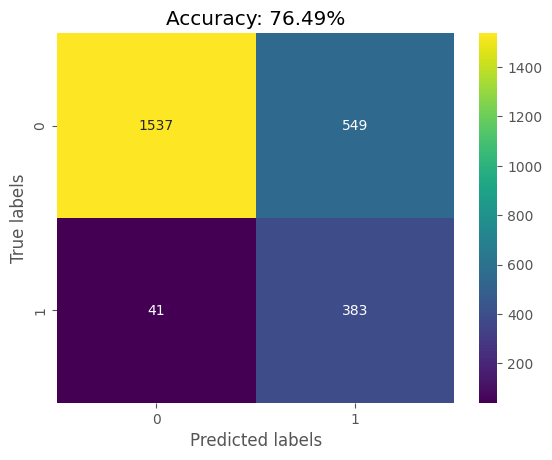

In [42]:
confusionMatrix = confusion_matrix(labeled_test, labelPredicted)
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, fmt='g', ax=ax, cmap="viridis") # annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(f"Accuracy: {testScore*100:.2f}%")

ax.xaxis.set_ticklabels([0, 1])
ax.yaxis.set_ticklabels([0, 1])

# plt.savefig(r"SVC confusionMatrix.png", dpi=1000)
plt.show()

In [18]:
classifierVariables = {
    "firstRow": {"kernel": "linear"},
    "secondRow": {"kernel": "poly"},
    "thirdRow": {"kernel": "rbf"},
    "fourthRow": {"kernel": "sigmoid"}
    }

for row in classifierVariables:
    print(classifierVariables[row])
    # print(str(classifierVariables[row]).replace('\'', '').replace(':', '~').replace('{','').replace('}', ' - '))

{'kernel': 'linear'}
{'kernel': 'poly'}
{'kernel': 'rbf'}
{'kernel': 'sigmoid'}
